# IRIS FLOWER CLASSIFICATION 

In [1]:
#import ibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
iris=pd.read_csv("IRIS.csv")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

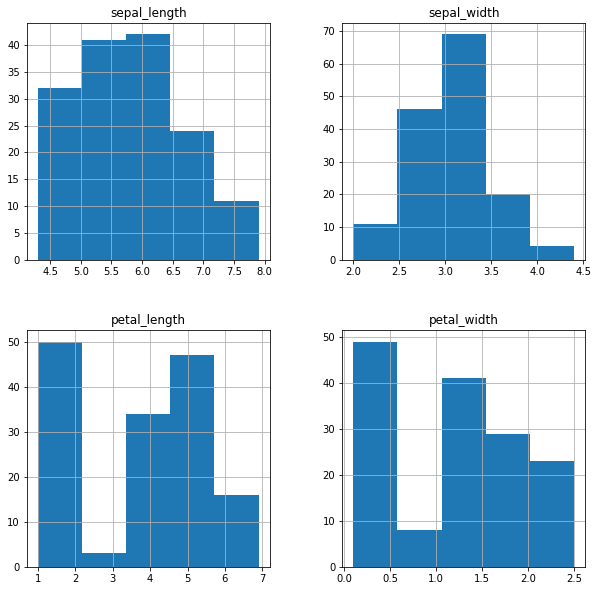

In [99]:
iris.hist(bins=5,figsize=(10,10))

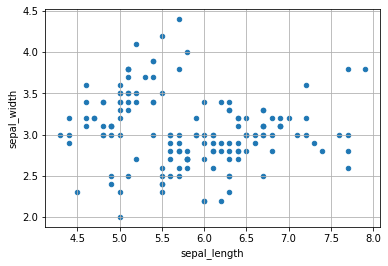

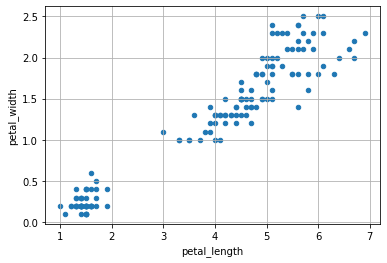

In [110]:
iris.plot(kind ="scatter",
          x ='sepal_length',
          y ='sepal_width')
plt.grid()

iris.plot(kind="scatter",x='petal_length',y='petal_width')
plt.grid()

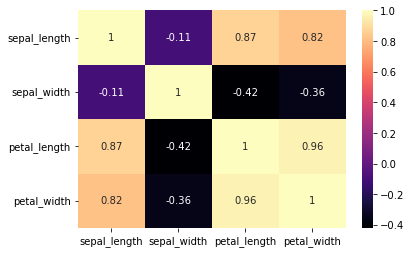

In [38]:
corr_matrix=iris.corr()
sns.heatmap(corr_matrix, cmap='magma',annot=True) #correlation heatmap
plt.show()

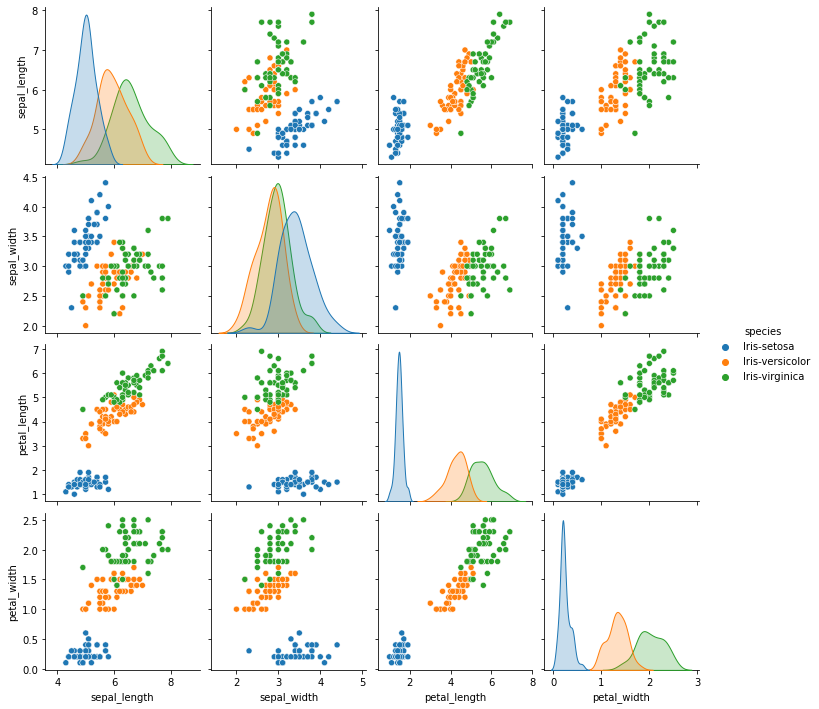

In [6]:
sns.pairplot(iris, hue='species')
plt.show()

In [8]:
iris['species'].value_counts()  #count of species


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
x=iris.iloc[:,:4] #x contains all the independent variables
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y=iris.iloc[:,4] #y contains the target variable Species
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [42]:
#split the data into training and test data

from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

In [15]:
x_train.shape

(105, 4)

In [16]:
x_test.shape

(45, 4)

[Text(0.4, 0.9, 'X[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

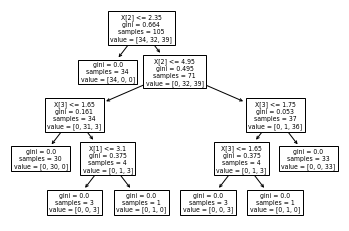

In [87]:
#creating a decision tree classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
iris_clf=clf.fit(x_train,y_train)
tree.plot_tree(iris_clf)

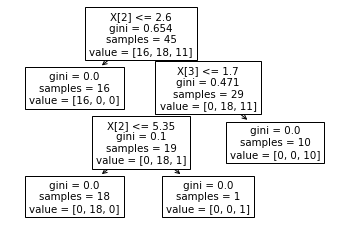

In [88]:
#checking validation test data based on trained model
#predict accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

y_pred=iris_clf.predict(x_test)

#checking model performance and decision tree on test data
iris_clf1=clf.fit(x_test,y_test)
tree.plot_tree(iris_clf1)
y_pred1=iris_clf1.predict(x_test)

In [89]:
accuracy1=accuracy_score(y_test,y_pred)  #checking accuracy for training model on test data
accuracy1         

0.9777777777777777

In [90]:
accuracy2=accuracy_score(y_test,y_pred1)   #accuracy for test data
accuracy2

1.0

In [91]:
cm1 = confusion_matrix(y_test,y_pred)  #confusion matrix for training data
cm1

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [92]:
cm2=confusion_matrix(y_test,y_pred1)   #confusion matrix for test data
cm2

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]], dtype=int64)

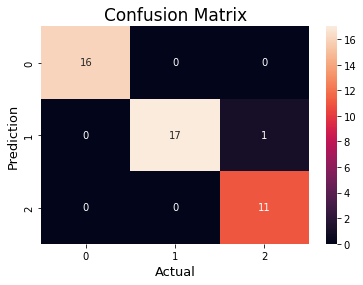

In [93]:
sns.heatmap(cm1,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

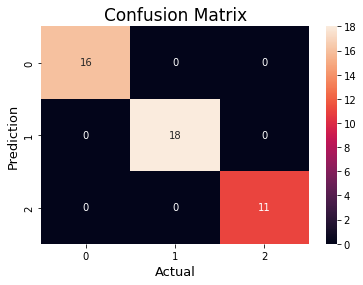

In [94]:
sns.heatmap(cm2,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [96]:
f1_score(y_test, y_pred, average=None)  #F1 score for training data




array([1.        , 0.97142857, 0.95652174])

In [97]:
f1_score(y_test, y_pred1, average=None) #F1 score for test data


array([1., 1., 1.])